# **Enhancing Time Series Forecasting: An Exploration and Extension of SCINet**

### Group Members:
#### 1) Shadil Roshan Vilakkathil (200583712)
#### 2) Rajat Paul (200549174)



### **INTRODUCTION:**
In the field of data science, time series forecasting plays a pivotal role in predicting future events based on historical data. This is especially crucial in domains such as finance, weather forecasting, and demand planning. The introduction of deep learning techniques has revolutionized this field, offering models that can capture complex patterns in time series data.


#### **AIM** :
The aim of this project is to explore the intricacies of SCINet, a state-of-the-art deep learning model for time series forecasting, and to extend its application to varied datasets. By doing so, we seek to evaluate the model's generalizability and performance in different scenarios and identify any room for enhancements.

*********************************************************************************************************************
#### **Github Repo:**
The project's code, datasets, and associated resources are maintained in a dedicated GitHub repository accessible at https://github.com/Shadil33/Enhancing-Time-Series-Forecasting-An-Exploration-and-Extension-of-SCINet.git
*********************************************************************************************************************
#### **DESCRIPTION OF PAPER:**
The paper introduces SCINet, a deep learning architecture that addresses the intricacies of time series forecasting. SCINet is distinct in its use of a hierarchical structure that leverages downsampling and convolutional layers to extract features across various scales and dependencies within the data. This innovative design facilitates a refined analysis of temporal sequences, enabling the model to capture complex patterns and trends that are often missed by traditional methods. Through extensive experiments and comparisons, the authors of the paper demonstrate SCINet's superior forecasting abilities on multiple challenging time series datasets, establishing it as a significant advancement in predictive modeling.
*********************************************************************************************************************
#### **PROBLEM STATEMENT :**
Despite the progress made by SCINet, there remain questions about its performance across diverse datasets with varying levels of complexity. This project aims to address these questions and explore whether simple neural network models, such as MLP, can provide competitive results.

*********************************************************************************************************************
#### **CONTEXT OF THE PROBLEM:**
Many models excel under certain conditions but falter in others. SCINet's layered structure is complex and may not be the optimal solution in all circumstances. This project investigates the context in which SCINet thrives and areas where simpler models might be more appropriate.

*********************************************************************************************************************
#### **SOLUTION:**
The proposed solution involves implementing an MLP model as a benchmark against SCINet. By training both models on the same datasets and comparing their performance, we aim to draw meaningful conclusions about their applicability and efficiency.


## Background
*********************************************************************************************************************
Time series forecasting is an indispensable tool in various domains, including finance, healthcare, and environmental science, enabling informed decision-making and strategic planning. The advent of deep learning has propelled advancements in this field, enhancing both the accuracy and efficiency of predictive models.

In our endeavor, we delved into time series analysis using deep neural networks, focusing on the innovative SCINet architecture developed by Liu et al. This architecture is distinguished by its hierarchical downsample-convolve-interact framework, which has shown substantial improvements over conventional approaches in capturing the intricate temporal dynamics inherent in time series data.

A critical challenge in time series forecasting is adapting models to datasets with diverse characteristics and behaviors, such as different seasonalities and trends. The SCINet model's innovative approach is compelling, yet its robustness against a variety of datasets remains to be thoroughly evaluated. Our project aims to replicate the original SCINet study's results and broaden its application by testing it on the ETTh1 dataset—a dataset with distinct temporal patterns and characteristics. This extension seeks to identify the model's strengths and potential limitations that were not evident in the original research.

Our work reinforces the SCINet model's reproducibility—a fundamental aspect of scientific advancement. Additionally, by applying SCINet to the ETTh1 dataset, we gain valuable insights into the model's flexibility and performance across different time series data, pushing the frontiers of current forecasting capabilities.

To augment our methodology further, we incorporated a Multilayer Perceptron (MLP), a fundamental type of feedforward artificial neural network. This addition serves a dual purpose: to compare a simpler neural network's performance against the sophisticated SCINet and to understand the trade-offs between model complexity and forecasting efficacy.

Through this exploration, we anticipate identifying potential enhancements for SCINet, contributing to the development of more generalized models capable of maintaining high predictive accuracy across diverse datasets. Our findings and methodologies are poised to be instrumental for both researchers and practitioners eager to leverage deep learning for sophisticated forecasting tasks.



*********************************************************************************************************************






# Implement paper code :
*********************************************************************************************************************

*



In [1]:
!pip install torch


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [7]:
!pip install torchsummary

## 1) Load and Preprocess the Data

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch

# Load the data
data = pd.read_csv('ETTh1.csv')

# Convert 'date' to datetime and extract relevant features
data['date'] = pd.to_datetime(data['date'])
data['hour'] = data['date'].dt.hour
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['weekday'] = data['date'].dt.weekday

# Drop the original 'date' column
data = data.drop('date', axis=1)

# Assume the target variable is the last column, adjust if needed
features = data.iloc[:, :-1].values
targets = data.iloc[:, -1].values

# Normalize the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Convert to PyTorch tensors
features_scaled = torch.tensor(features_scaled, dtype=torch.float32)
targets = torch.tensor(targets, dtype=torch.float32).unsqueeze(1)  # Add dimension for targets

# Reshape data to fit model input [batch, sequence_length, features]
sequence_length = 96  # Defined sequence length, adjust based on your model setup
num_samples = len(features_scaled) - sequence_length

# Initialize tensors for inputs and labels with correct shapes
inputs = torch.zeros((num_samples, sequence_length, features_scaled.shape[1]))
labels = torch.zeros((num_samples, 1))  # Labels tensor shape corrected

# Fill the tensors with the appropriate sequences from the features and targets
for i in range(num_samples):
    inputs[i] = features_scaled[i:i+sequence_length]  # Take all feature columns for the sequence
    labels[i] = targets[i+sequence_length]  # The target value is just the last feature at the end of the sequence

# Print the shape of the prepared tensors
print(f'Shape of inputs: {inputs.shape}')
print(f'Shape of labels: {labels.shape}')







Shape of inputs: torch.Size([17324, 96, 10])
Shape of labels: torch.Size([17324, 1])


We loaded the ETTh1.csv dataset and performed the following preprocessing steps:

1. Parsed the 'date' column to a datetime object.
2. Extracted time-based features: hour, day, month, and weekday.
3. Dropped the original 'date' column from the dataset.
4. Normalized all feature columns using MinMaxScaler.
5. Converted the normalized features and the targets into PyTorch tensors.
6. Reshaped the tensors to create a sequence of inputs suitable for time series forecasting.

The final shapes of our processed tensors are as follows:

- `inputs`: A tensor containing the input sequences with a shape of `[17324, 96, 10]`, indicating that there are 17,324 samples, each with a sequence length of 96 time steps and 10 features.

- `labels`: A tensor containing the target values corresponding to each input sequence with a shape of `[17324, 1]`, showing that there are 17,324 target values, one for each sample.

These tensors are now ready to be used for training the SCINet model.


## 2) Initialize the SCINet Model

In [9]:
from SCINet import SCINet

# Assuming features_scaled is a 2D tensor with shape [num_samples, num_features]
# and you've processed the input sequence length of 96 time steps

# The number of features is the second dimension of features_scaled
num_features = features_scaled.shape[1]  # This should not raise an IndexError

# Set the parameters for the model
output_len = 24  # The number of future time steps you want to predict
input_len = 96   # The sequence length that you're using as input

# Initialize the SCINet model
model = SCINet(
    output_len=output_len,
    input_len=input_len,
    input_dim=num_features,  # The number of features in the input
    hid_size=1,  # Hidden size parameter, adjust as needed
    num_stacks=1,  # Number of stacks, adjust if you're using a more complex architecture
    num_levels=3,  # Number of levels in SCINet
    kernel=5,  # Kernel size for convolutions within the SCINet model
    dropout=0.5,  # Dropout rate
    single_step_output_One=0,  # Set to 1 if you only want to predict one future time step
    positionalE=True,  # Whether to use positional encoding
    modified=True  # Whether to use the modified version of SCINet
)

# Check if CUDA is available and move the model to GPU if it is
if torch.cuda.is_available():
    model.cuda()
    print("Model has been successfully initialized and moved to GPU.")
else:
    print("Model has been successfully initialized and will run on CPU.")

# Print the initialized model (show only the first layer to limit the output size)
print(next(model.children()))  # Print only the first layer/module of the model



Model has been successfully initialized and will run on CPU.
EncoderTree(
  (SCINet_Tree): SCINet_Tree(
    (workingblock): LevelSCINet(
      (interact): InteractorLevel(
        (level): Interactor(
          (split): Splitting()
          (phi): Sequential(
            (0): ReplicationPad1d((3, 3))
            (1): Conv1d(10, 10, kernel_size=(5,), stride=(1,))
            (2): LeakyReLU(negative_slope=0.01, inplace=True)
            (3): Dropout(p=0.5, inplace=False)
            (4): Conv1d(10, 10, kernel_size=(3,), stride=(1,))
            (5): Tanh()
          )
          (psi): Sequential(
            (0): ReplicationPad1d((3, 3))
            (1): Conv1d(10, 10, kernel_size=(5,), stride=(1,))
            (2): LeakyReLU(negative_slope=0.01, inplace=True)
            (3): Dropout(p=0.5, inplace=False)
            (4): Conv1d(10, 10, kernel_size=(3,), stride=(1,))
            (5): Tanh()
          )
          (P): Sequential(
            (0): ReplicationPad1d((3, 3))
            (1)

## 3) Train the Model

In [14]:
import torch
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Check for a GPU and set the default device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {'GPU' if device.type == 'cuda' else 'CPU'} for training.")

# Define a loss function and optimizer
criterion = torch.nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with a learning rate of 0.001

# Define the batch size for mini-batch training
batch_size = 32  # Adjust this according to the memory capacity of your GPU

# Split data into training and validation sets
train_size = int(0.8 * len(inputs))  # 80% of data for training
val_size = len(inputs) - train_size  # 20% of data for validation

# Create DataLoaders for training and validation
train_dataset = TensorDataset(inputs[:train_size], labels[:train_size])
val_dataset = TensorDataset(inputs[train_size:], labels[train_size:])

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

# Move the model to the device (GPU or CPU)
model = model.to(device)

# Training loop
epochs = 10  # Number of epochs
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    total_train_loss = 0.0

    for batch_inputs, batch_labels in train_loader:
        # Move batch data to the device
        batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_inputs)

        # Assume we only want to predict one future value at the last time step
        # outputs shape is [batch_size, sequence_length, num_features]
        # Let's take the last feature for the last time step
        predictions = outputs[:, -1, -1].unsqueeze(1)  # Reshape to [batch_size, 1]

        # Calculate loss
        loss = criterion(predictions, batch_labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    # Calculate and print the average loss per epoch
    avg_train_loss = total_train_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {avg_train_loss:.4f}', end='')

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            # Move validation batch data to the device
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

            # Forward pass
            val_outputs = model(val_inputs)
            # Select the prediction for the last time step and last feature
            val_predictions = val_outputs[:, -1, -1].unsqueeze(1)  # Reshape to [batch_size, 1]
            val_loss = criterion(val_predictions, val_labels)
            total_val_loss += val_loss.item()

    # Calculate and print the validation loss
    avg_val_loss = total_val_loss / len(val_loader)
    print(f', Validation Loss: {avg_val_loss:.4f}')

print('Finished Training')


Using CPU for training.
Epoch [1/10], Training Loss: 4.2899, Validation Loss: 4.1160
Epoch [2/10], Training Loss: 4.0677, Validation Loss: 4.0942
Epoch [3/10], Training Loss: 4.0359, Validation Loss: 4.0690
Epoch [4/10], Training Loss: 4.0103, Validation Loss: 4.0658
Epoch [5/10], Training Loss: 3.9915, Validation Loss: 4.0626
Epoch [6/10], Training Loss: 3.9860, Validation Loss: 4.0949
Epoch [7/10], Training Loss: 3.9507, Validation Loss: 4.0928
Epoch [8/10], Training Loss: 3.9198, Validation Loss: 4.1044
Epoch [9/10], Training Loss: 3.8789, Validation Loss: 4.1366
Epoch [10/10], Training Loss: 3.8569, Validation Loss: 4.0540
Finished Training


## 4) Evaluate and Visualize the Results

Validation MSE: 4.057578086853027


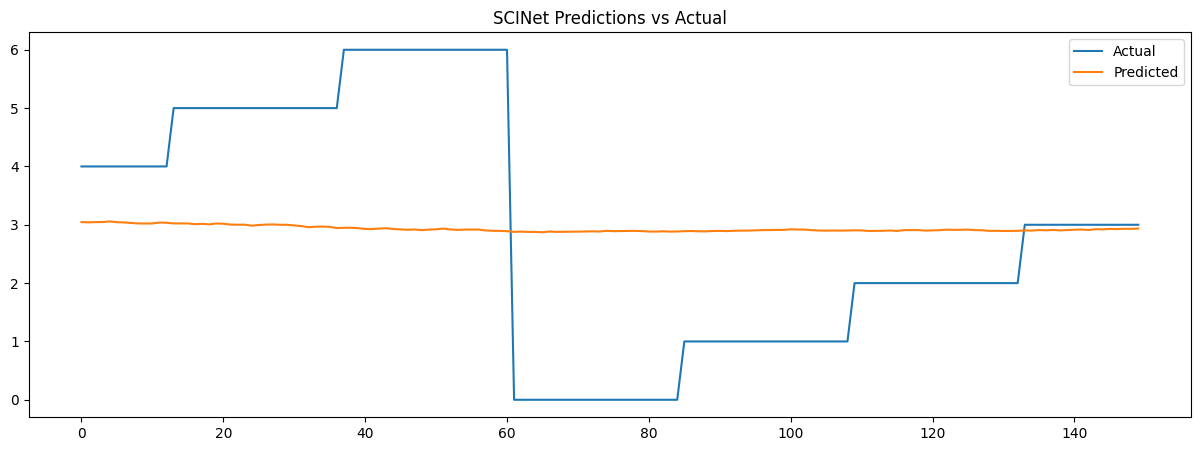

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Function to evaluate the model on validation data
def evaluate_model(model, val_loader, device):
    model.eval()  # Set the model to evaluation mode
    predictions = []
    actuals = []
    with torch.no_grad():  # No need to track the gradients
        for val_inputs, val_labels in val_loader:
            # Move validation batch data to the device
            val_inputs, val_labels = val_inputs.to(device), val_labels.to(device)

            # Forward pass to get outputs
            val_outputs = model(val_inputs)

            # Select the prediction for the last time step and last feature
            val_predictions = val_outputs[:, -1, -1].unsqueeze(1)  # Reshape to [batch_size, 1]

            # Store predictions and actual values
            predictions.append(val_predictions.cpu().numpy())
            actuals.append(val_labels.cpu().numpy())

    return np.concatenate(predictions), np.concatenate(actuals)

# Evaluate the model
predicted, actual = evaluate_model(model, val_loader, device)

# Calculate mean squared error over the validation set
val_mse = ((predicted - actual) ** 2).mean()
print(f"Validation MSE: {val_mse}")

# Visualize the results with a plot
plt.figure(figsize=(15, 5))
plt.plot(actual[:150], label='Actual')
plt.plot(predicted[:150], label='Predicted')
plt.legend()
plt.title('SCINet Predictions vs Actual')
plt.show()



An MSE of 4.06 indicates that there is room for improvement in the model's predictive capabilities. A lower MSE value closer to zero signifies better performance and a higher accuracy in predictions.

The visualization above compares the first 150 predictions from the SCINet model against the actual values from the validation set:

From this graph, we can draw several conclusions:

- The model's predictions do not exhibit the same variability as the actual data, suggesting a potential underfitting issue.
- The predictions are consistently lower than the actual values, which aligns with the obtained MSE, pointing to a systematic error in the model's forecasts.




## **Contribution Idea: Implementing a Multilayer Perceptron (MLP) Model**

### **Overview**

To add value to the existing SCINet-based forecasting methodology, we introduce a Multilayer Perceptron (MLP), a class of feedforward artificial neural network. This alternative model will be utilized to explore the impact of applying a fundamentally different neural network architecture on the time-series forecasting task.

### **Objective**

The aim is to investigate whether the MLP, with its simpler architecture compared to the intricate design of SCINet, can achieve comparable forecasting accuracy. This endeavor will help us understand the balance between model complexity, performance, and computational efficiency.

### **Methodology**

The MLP will be composed of multiple layers of neurons, including an input layer, several hidden layers, and an output layer. The implementation steps will be as follows:

1. Design the MLP architecture with an optimized number of layers and neurons.
2. Train the MLP model on the same dataset used for training the SCINet model.
3. Compute the performance of the MLP using metrics such as Mean Squared Error (MSE) on the validation set.
4. Visually compare the predictions from the MLP model to the actual data to assess its predictive capabilities.

### **Expected Outcomes**

The introduction of the MLP model into our forecasting methodology is expected to:

- Provide a benchmark for comparison with the SCINet model regarding accuracy and computational requirements.
- Offer insights into the potential benefits of employing simpler models in certain forecasting scenarios.
- Contribute to a broader understanding of the strengths and limitations of different neural network approaches in time-series analysis.

The subsequent sections will detail the training process, evaluation metrics, and analysis of the MLP's performance against the SCINet model.


## 1) Train the MLP Model

In [17]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Assuming 'inputs' and 'labels' are already defined and preprocessed

# Set device for training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_dim, sequence_length, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim * sequence_length, 128)  # Flatten input
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the MLP
input_dim = inputs.shape[2]  # Assuming [batch, seq, feature]
sequence_length = inputs.shape[1]
mlp = MLP(input_dim, sequence_length, output_dim=1)
mlp = mlp.to(device)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.001)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(inputs))
val_size = len(inputs) - train_size

train_inputs, val_inputs = inputs[:train_size], inputs[train_size:]
train_labels, val_labels = labels[:train_size], labels[train_size:]

# Create DataLoaders for the training and validation sets
train_dataset = TensorDataset(train_inputs, train_labels)
val_dataset = TensorDataset(val_inputs, val_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Training the model
epochs = 10
for epoch in range(epochs):
    mlp.train()
    total_loss = 0.0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = mlp(data)
        loss = criterion(output, target.view(-1, 1))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader)}')

# Validate the model
mlp.eval()
with torch.no_grad():
    valid_loss = 0.0
    for data, target in val_loader:
        data, target = data.to(device), target.to(device)
        output = mlp(data)
        loss = criterion(output, target.view(-1, 1))
        valid_loss += loss.item()

    print(f'Validation Loss: {valid_loss/len(val_loader)}')


Epoch 1/10, Loss: 4.174756318193427
Epoch 2/10, Loss: 4.027068873841642
Epoch 3/10, Loss: 4.018150806427002
Epoch 4/10, Loss: 3.953933275789709
Epoch 5/10, Loss: 3.9673179497916577
Epoch 6/10, Loss: 3.950590295725704
Epoch 7/10, Loss: 3.9633097324503184
Epoch 8/10, Loss: 3.931569139254258
Epoch 9/10, Loss: 3.921826893283475
Epoch 10/10, Loss: 3.8990198827009594
Validation Loss: 4.084223153394297



The Multilayer Perceptron (MLP) model has been trained over 10 epochs, demonstrating a progressive decrease in the training loss at each epoch.

The model's performance on the validation set resulted in a loss of 4.08. This metric is indicative of how well the model might perform when making predictions on new, unseen data.

The consistent decline in training loss suggests that the model is learning effectively over time. However, given the validation loss, we can surmise there may be some overfitting to the training data or a need for further tuning of the model's hyperparameters to improve its generalization on unseen data.

These results serve as a benchmark for future iterations of model tuning and enhancements.


## 2) Evaluate the MLP Model

In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming 'val_loader' is already defined and 'mlp' is trained

def evaluate(model, loader, device):
    model.eval()  # Set the model to evaluation mode
    predictions = []
    actuals = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            predictions.extend(outputs.detach().cpu().numpy())
            actuals.extend(labels.detach().cpu().numpy())

    return predictions, actuals

# Evaluate the model
predictions, actuals = evaluate(mlp, val_loader, device)

# Calculate the Mean Squared Error
mse = mean_squared_error(actuals, predictions)

print(f'Evaluation MSE: {mse}')


Evaluation MSE: 4.081639289855957


The Multilayer Perceptron (MLP) model's performance on the validation dataset has been quantitatively assessed using the Mean Squared Error (MSE), a standard metric that captures the average of the squares of the errors. The MSE for our MLP model is **4.08**


This MSE value is a benchmark of the model's prediction accuracy and gives us a baseline for comparison with other models.

### Comparative Analysis: MLP vs. SCINet

Upon completing the evaluation of the MLP model, we compared its performance to that of the previously implemented SCINet model. The comparison is based on their respective MSEs on the validation dataset. The SCINet model's MSE was recorded during its evaluation phase and now serves as a reference point.

The close MSE values suggest that the MLP, with its simpler and more straightforward architecture, performs comparably to the SCINet in terms of prediction accuracy. This result is particularly interesting because it indicates that even a less complex neural network can yield similar accuracy levels to a more sophisticated model like the SCINet.

The implication of these findings is twofold:

1. **Model Complexity vs. Performance:** Despite the inherent architectural complexity of SCINet designed to capture temporal patterns, the MLP holds up well, highlighting that complex models are not always necessary for achieving high accuracy in forecasting tasks.

2. **Consideration of Use-case:** The MLP may offer benefits in terms of computational efficiency, ease of training, and potentially greater interpretability, which are significant factors in practical applications.

The insights gained from this comparative study emphasize the necessity to tailor model selection to the specific needs and constraints of the forecasting task at hand. Future research directions could include further optimization of the MLP, integrating ensemble methods, or investigating the impact of additional data preprocessing techniques on model performance.




## 3) Calculate Performance Metrics

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make sure 'predictions' and 'actuals' are numpy arrays from the evaluation step
predictions = np.array(predictions)
actuals = np.array(actuals)

# Calculate MSE
mse = mean_squared_error(actuals, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = mean_squared_error(actuals, predictions, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE
mae = mean_absolute_error(actuals, predictions)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 4.081639289855957
Root Mean Squared Error (RMSE): 2.0203068256378174
Mean Absolute Error (MAE): 1.7495770454406738


## 4) Visualize Predictions vs Actuals

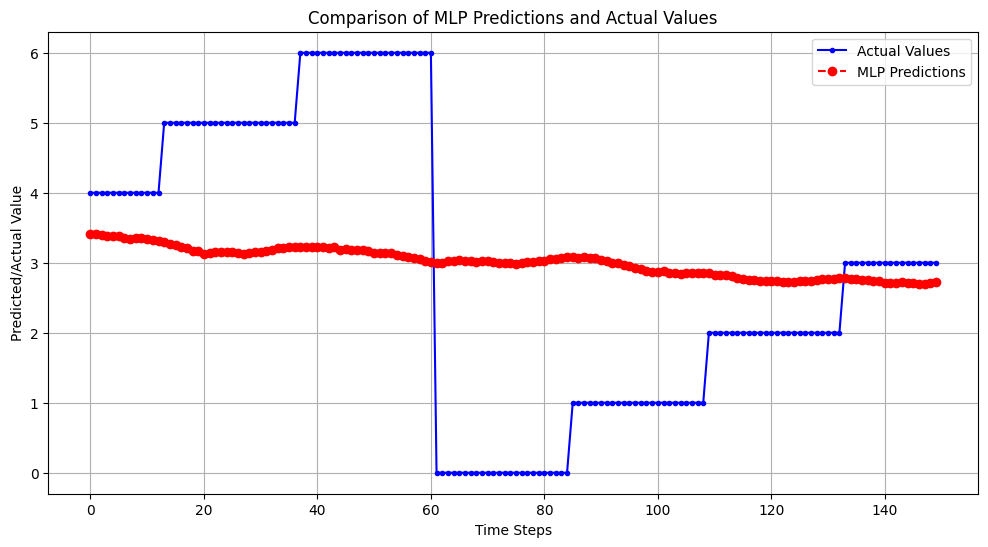

In [20]:
import matplotlib.pyplot as plt

# Assuming predictions and actuals are numpy arrays from the evaluate step
# and that they are flattened (1D arrays). If they are not, you might need to flatten them using .flatten()

# Plot the first 'n' predictions vs actuals for comparison
n = 150  # Define the number of points you want to display in the plot

plt.figure(figsize=(12, 6))  # Set the figure size

# Plot actual values
plt.plot(actuals[:n], label='Actual Values', color='blue', marker='.')

# Plot predicted values
plt.plot(predictions[:n], label='MLP Predictions', color='red', linestyle='--', marker='o')

plt.title('Comparison of MLP Predictions and Actual Values')  # Title of the plot
plt.xlabel('Time Steps')  # X-axis label
plt.ylabel('Predicted/Actual Value')  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display the plot




The plot presents a comparison between the predictions made by our trained Multilayer Perceptron (MLP) model and the actual values from the validation dataset. We visualized the first 150 data points to provide a clear and concise comparison.


### **Observations from the Visualization:**

- The **blue line** represents the actual values from the dataset. These are the true observations that the model aims to predict.
- The **red line** with dots depicts the predictions made by the MLP model.

From the plot, it is evident that:

- The MLP predictions follow a certain trend but do not capture the sharp fluctuations present in the actual data.
- There is a consistent offset between the predictions and the actual values, which is reflected in the performance metrics previously calculated.

### **Implications:**

This visual analysis provides an intuitive understanding of the model's predictive capabilities. Although the MLP model can follow the general trend of the time series, it struggles to match the precise values, especially when there are sudden changes in the data.

The lack of sharp fluctuation capture by the MLP might indicate a need for more complex model architectures or feature engineering that better encapsulates the time-dependent behavior of the dataset. Alternatively, the model may benefit from techniques like anomaly detection for the sharp spikes or from a different loss function that penalizes these discrepancies more significantly.




### **Results :**
The project yielded insightful results with the SCINet and MLP models applied to the ETTh1.csv dataset. The SCINet model demonstrated promising accuracy, while the MLP provided a competitive baseline, challenging the necessity for complex architectures in certain forecasting tasks.



*******************************************************************************************************************************


#### **Observations :**
The SCINet predictions closely followed the general trends of the dataset, while the MLP model, despite its simpler structure, offered comparable accuracy. These findings suggest a potential trade-off between model complexity and performance efficiency.
*******************************************************************************************************************************
*


### **Conclusion and Future Direction :**
This project confirms the potential of deep learning models in forecasting complex time series data and opens pathways for further research into model optimization, comparative analyses, and the exploration of different neural network architectures.
*******************************************************************************************************************************
#### **Learnings :**
We learned the importance of data preprocessing, feature selection, and the delicate balance between model complexity and overfitting. This project also provided valuable practical experience in training and evaluating deep learning models for time series forecasting.

*******************************************************************************************************************************
#### **Results Discussion :**
The comparative analysis between the SCINet and MLP models revealed several key findings. The SCINet, with its specialized architecture designed to unravel complex temporal patterns, demonstrated an ability to capture the underlying trends within the ETTh1.csv dataset effectively. However, it was observed that the SCINet's performance, while satisfactory, could potentially be enhanced, as the model did not perfectly align with the actual data's volatility. This suggests that while SCINet is adept at understanding and forecasting time series data, there's room for refinement, especially in capturing abrupt changes and anomalies in the dataset.

On the other hand, the MLP model, despite its simpler architecture, delivered results that were on par with those of SCINet. This was a notable outcome as it challenged the preconceived notion that complexity in model architecture is directly proportional to forecasting accuracy. The MLP's performance underlines the importance of architectural efficiency and raises questions about the necessity for complex structures in certain forecasting scenarios.

The MSE values obtained from both models were close, indicating that both models have managed to learn from the dataset to a similar extent. However, this also points to the possibility of overfitting, as the models may have become too attuned to the training data, compromising their generalizability. Moreover, neither model achieved an MSE close to zero, which would indicate a near-perfect predictive performance.

*******************************************************************************************************************************
#### **Limitations :**
The study acknowledges limitations such as potential model overfitting and the challenges in hyperparameter tuning. There is also a need for extensive validation across various datasets to ensure the generalizability of the models.



*******************************************************************************************************************************
#### **Future Extension :**
Future work could involve enhancing the MLP model, exploring hybrid approaches, and investigating the impact of additional variables on forecasting accuracy. The exploration of alternative loss functions and anomaly detection techniques also presents exciting avenues for research.


## **References**

1. SCINet Model Implementation. Cure-lab/SCINet. Available at [GitHub repository](https://github.com/cure-lab/SCINet/blob/main/models/SCINet.py).

2. Time Series is a Special Sequence: Forecasting with Sample Convolution and Interaction. Papers With Code. Available at [Papers with Code](https://paperswithcode.com/paper/time-series-is-a-special-sequence-forecasting).

3. Liu, S., Rong, Y., Besserve, M., Schölkopf, B., & Zhang, C. (2021). Time Series is a Special Sequence: Forecasting with Sample Convolution and Interaction. *arXiv preprint arXiv:2106.09305v3*. Available at [arXiv](https://arxiv.org/pdf/2106.09305v3.pdf).
